In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot setup
%matplotlib inline
sns.set(context="notebook", style="whitegrid")

# Locate your data file (picks the first .csv in ../data)
DATA_DIR = Path("../data")
csv_files = sorted(DATA_DIR.glob("*.csv"))
assert len(csv_files) >= 1, "No CSV found in ../data. Put your Titanic CSV there."
data_path = csv_files[0]  # change to a specific file if you want
print("Using file:", data_path.name)

df = pd.read_csv(data_path)
df.head()


Using file: Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

print("\nInfo:")
df.info()

print("\nNumeric summary:")
display(df.describe())

print("\nCategorical summary (top categories):")
display(df.select_dtypes(include=["object", "category"]).describe())


Shape: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Numeric summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Categorical summary (top categories):


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


,missing,ratio
Cabin,687,0.771
Age,177,0.199
Embarked,2,0.002


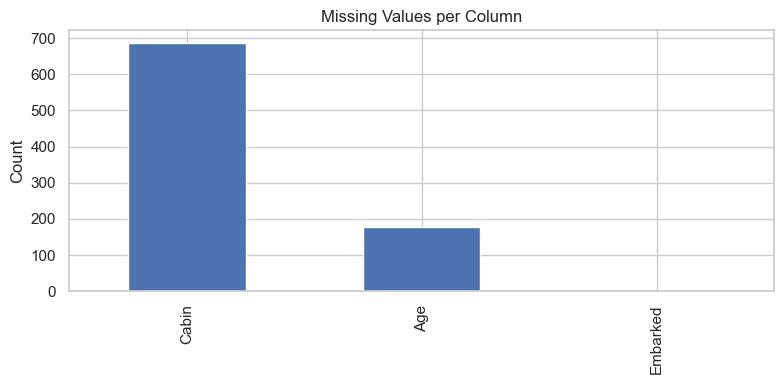

In [4]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_ratio = (missing_counts / len(df)).round(3)
missing_table = pd.DataFrame({"missing": missing_counts, "ratio": missing_ratio})
display(missing_table[missing_table["missing"] > 0])

# Simple bar chart of missing counts
plt.figure(figsize=(8, 4))
missing_counts[missing_counts > 0].plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Survived
0    549
1    342
Name: count, dtype: int64

Class balance (ratio):
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


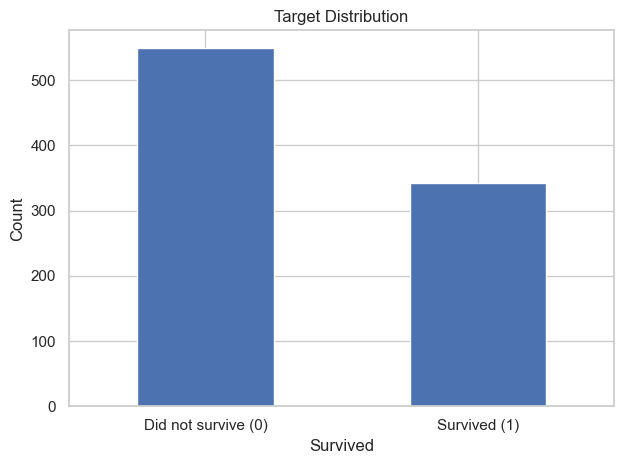

In [5]:
if "Survived" in df.columns:
    print(df["Survived"].value_counts())
    print("\nClass balance (ratio):")
    print(df["Survived"].value_counts(normalize=True).round(3))

    # Bar plot for target
    ax = df["Survived"].value_counts().sort_index().plot(kind="bar")
    ax.set_xticklabels(["Did not survive (0)", "Survived (1)"], rotation=0)
    plt.title("Target Distribution")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No 'Survived' column found — this looks like a test/holdout file.")



=== Sex ===


Sex
male      577
female    314
Name: count, dtype: int64

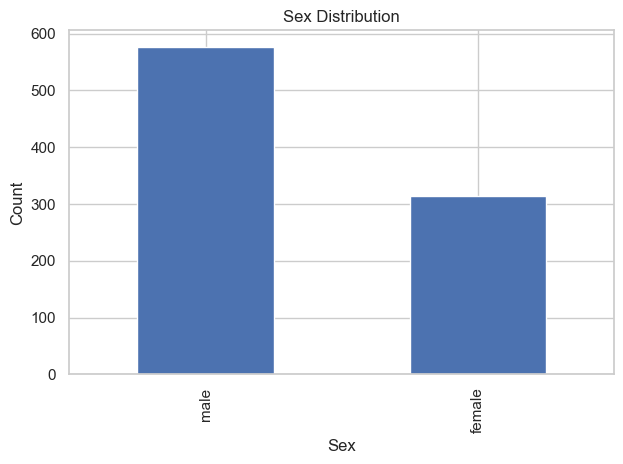

Survived,0,1
Sex,,
female,0.258,0.742
male,0.811,0.189


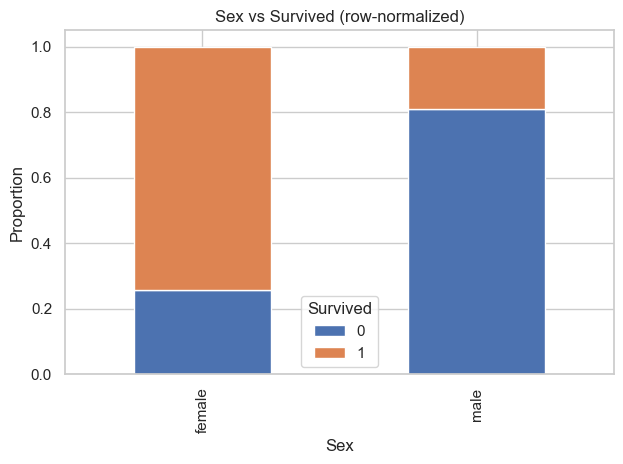


=== Pclass ===


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

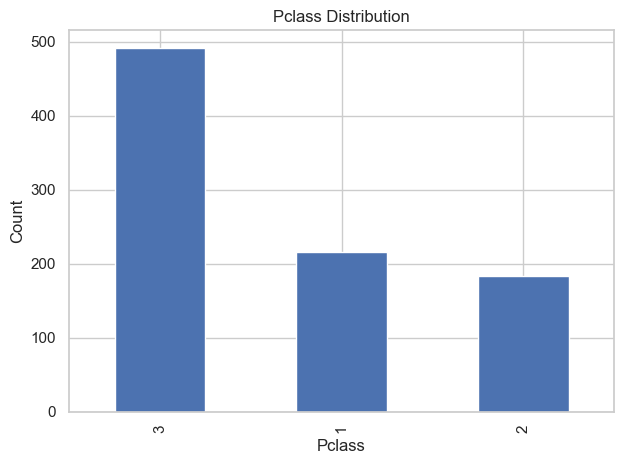

Survived,0,1
Pclass,,
1,0.370,0.630
2,0.527,0.473
3,0.758,0.242


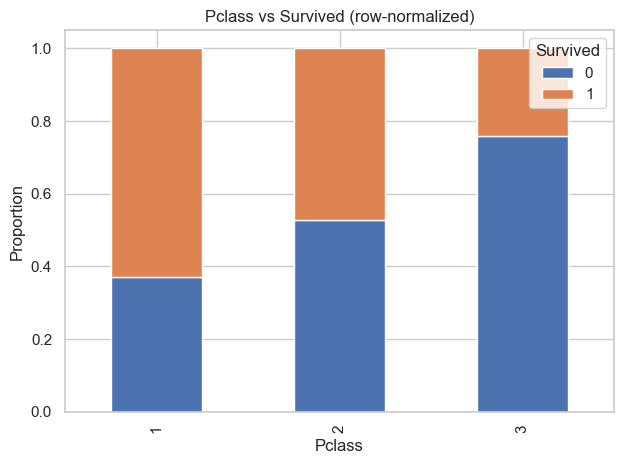


=== Embarked ===


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

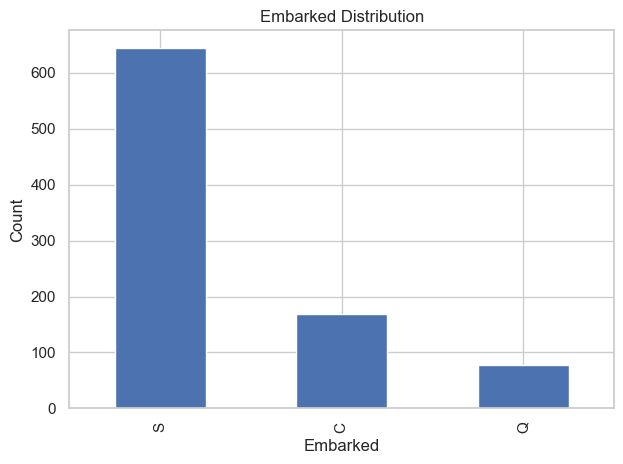

Survived,0,1
Embarked,,
C,0.446,0.554
Q,0.610,0.390
S,0.663,0.337


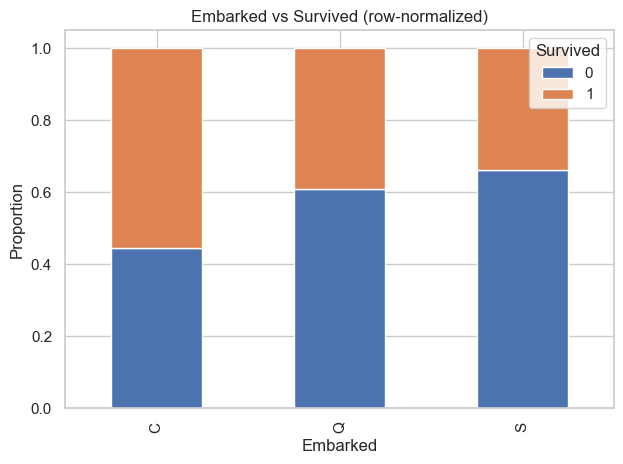

In [6]:
categoricals = [c for c in ["Sex", "Pclass", "Embarked"] if c in df.columns]

for col in categoricals:
    print(f"\n=== {col} ===")
    display(df[col].value_counts())

    # Overall distribution
    ax = df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Distribution")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Conditional distribution by target (if available)
    if "Survived" in df.columns:
        ct = pd.crosstab(df[col], df["Survived"], normalize="index").round(3)
        display(ct)

        ct.plot(kind="bar", stacked=True)
        plt.title(f"{col} vs Survived (row-normalized)")
        plt.ylabel("Proportion")
        plt.legend(title="Survived", loc="best")
        plt.tight_layout()
        plt.show()



=== Age ===


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

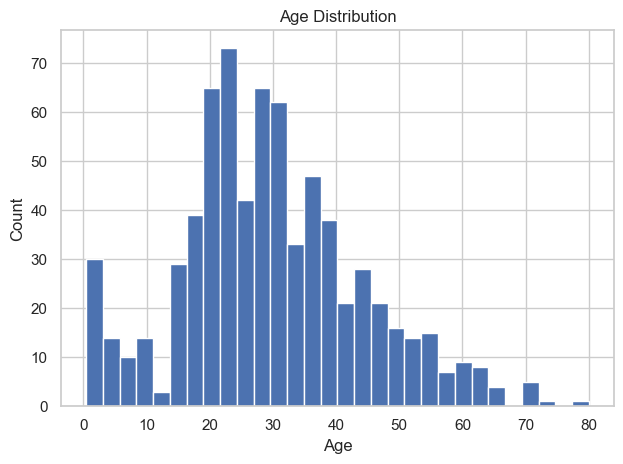

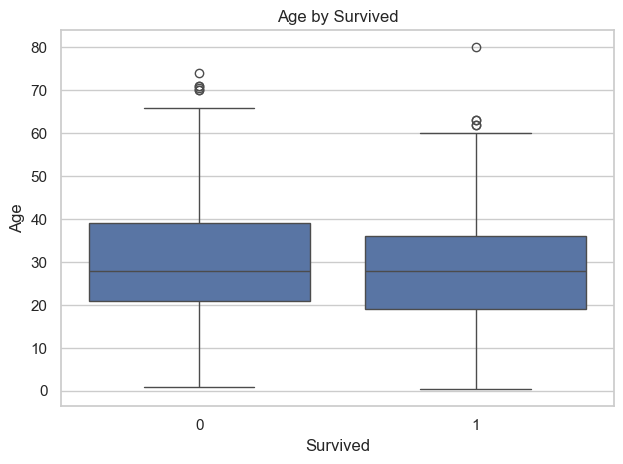


=== Fare ===


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

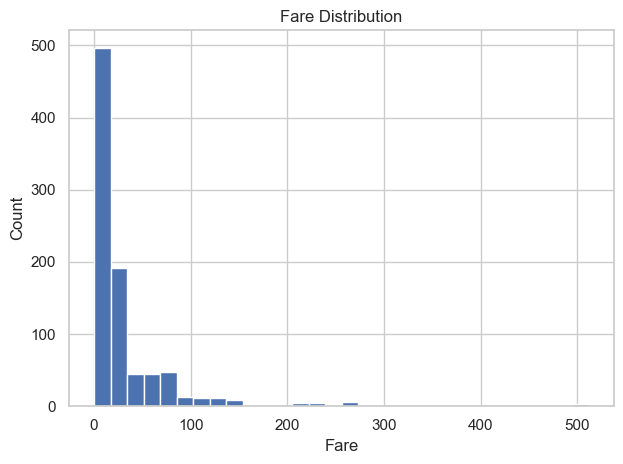

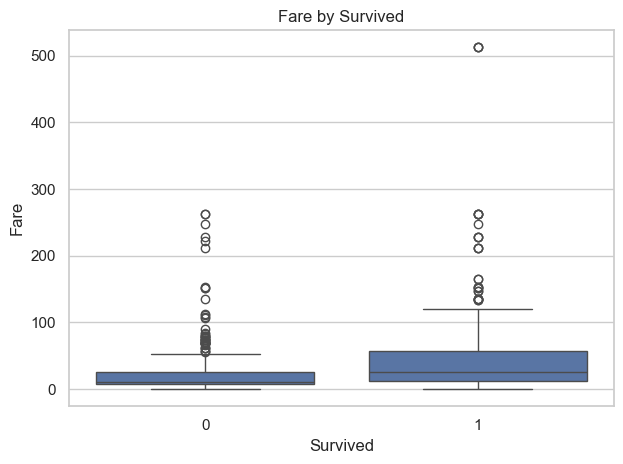


=== SibSp ===


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

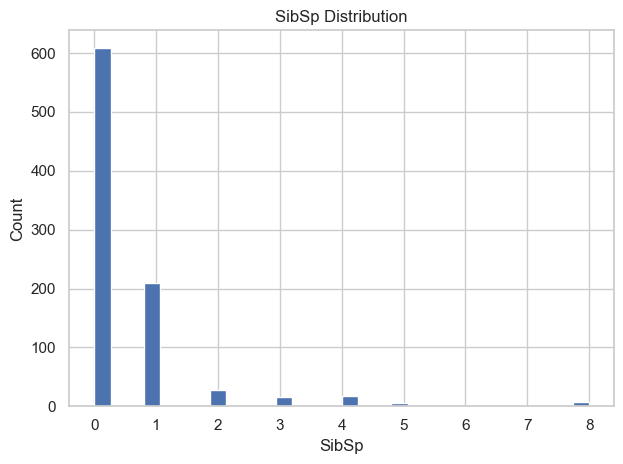

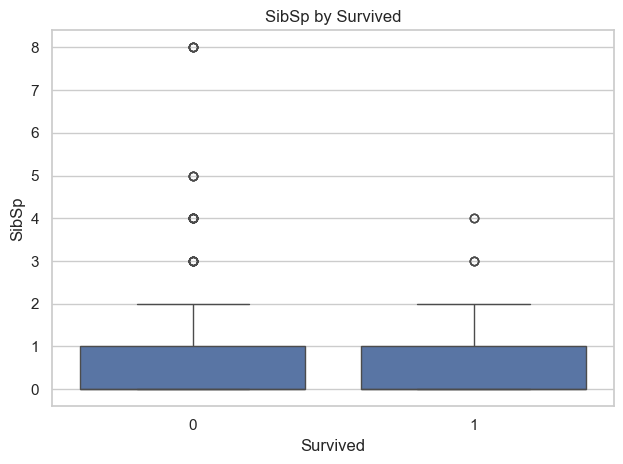


=== Parch ===


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

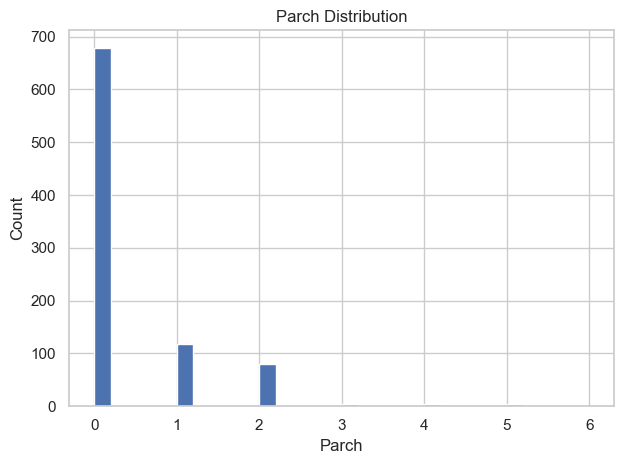

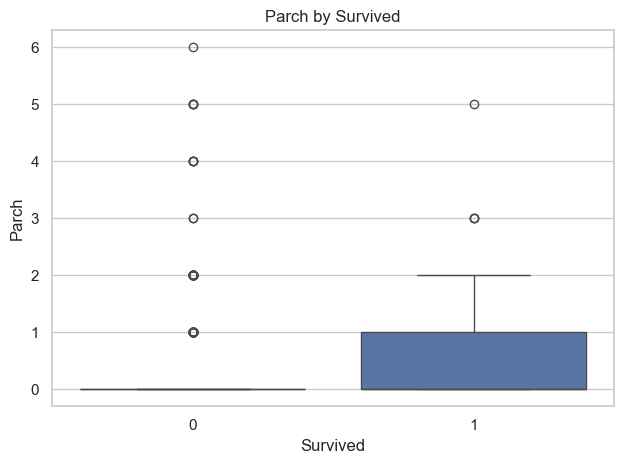

In [7]:
numeric_cols = [c for c in ["Age", "Fare", "SibSp", "Parch"] if c in df.columns]

for col in numeric_cols:
    print(f"\n=== {col} ===")
    display(df[col].describe())

    # Histogram
    df[col].hist(bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Boxplot (optionally against Survived if available)
    if "Survived" in df.columns:
        sns.boxplot(data=df, x="Survived", y=col)
        plt.title(f"{col} by Survived")
        plt.tight_layout()
        plt.show()


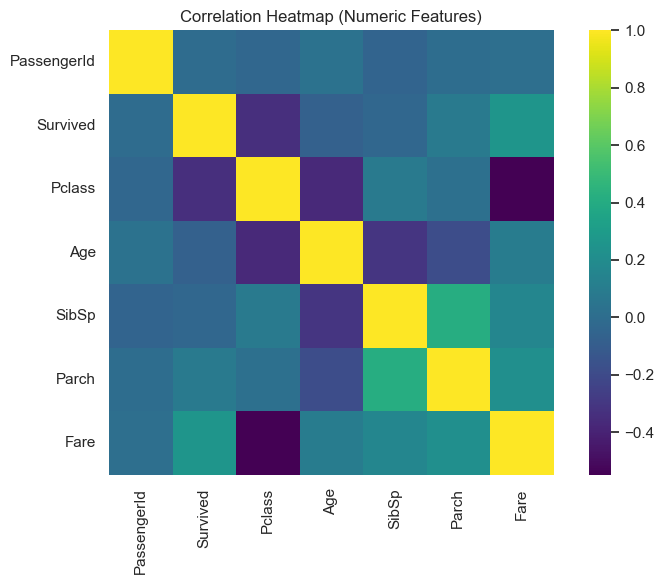


Correlation with Survived:


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [8]:
# Select numeric columns only
num_df = df.select_dtypes(include=[np.number]).copy()

if not num_df.empty:
    corr = num_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=False, cmap="viridis", square=True)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()

    if "Survived" in corr.columns:
        print("\nCorrelation with Survived:")
        display(corr["Survived"].sort_values(ascending=False))
else:
    print("No numeric columns found for correlation.")



=== FamilySize (preview) ===


FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

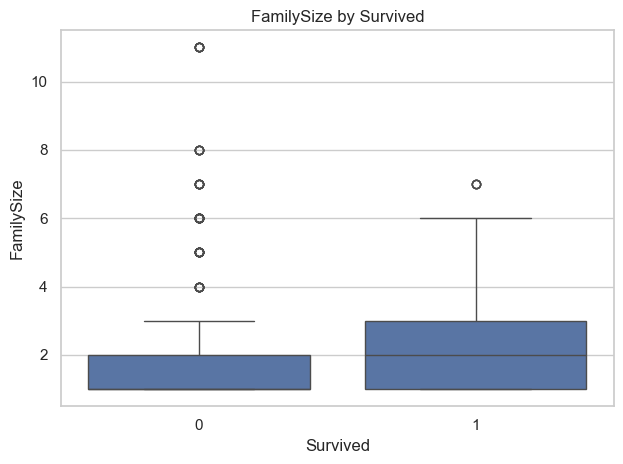


=== IsAlone (preview) ===


IsAlone
1    537
0    354
Name: count, dtype: int64

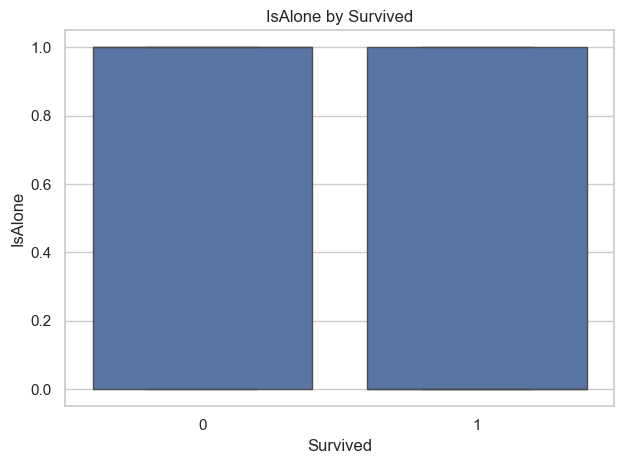


=== Title (preview) ===


Title
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Col         2
Mlle        2
Major       2
Ms          1
Name: count, dtype: int64

Survived,0,1
Title,,
Capt,1.000,0.000
Col,0.500,0.500
Don,1.000,0.000
Dr,0.571,0.429
Jonkheer,1.000,0.000
Lady,0.000,1.000
Major,0.500,0.500
Master,0.425,0.575
Miss,0.302,0.698


In [9]:
df_preview = df.copy()

# FamilySize = Parch + SibSp + 1 (self)
if {"SibSp", "Parch"}.issubset(df_preview.columns):
    df_preview["FamilySize"] = df_preview["SibSp"] + df_preview["Parch"] + 1

# IsAlone = 1 if FamilySize == 1 else 0
if "FamilySize" in df_preview.columns:
    df_preview["IsAlone"] = (df_preview["FamilySize"] == 1).astype(int)

# Title extraction from Name (Mr, Mrs, Miss, etc.)
if "Name" in df_preview.columns:
    df_preview["Title"] = (
        df_preview["Name"]
        .str.extract(r",\s*([^\.]+)\.")
        .iloc[:, 0]
        .str.strip()
    )

# Preview impact vs Survived if target exists
for col in ["FamilySize", "IsAlone", "Title"]:
    if col in df_preview.columns:
        print(f"\n=== {col} (preview) ===")
        display(df_preview[col].value_counts().head(10))
        if "Survived" in df_preview.columns:
            if df_preview[col].dtype.kind in "biufc":  # numeric
                sns.boxplot(data=df_preview, x="Survived", y=col)
                plt.title(f"{col} by Survived"); plt.tight_layout(); plt.show()
            else:  # categorical
                ct = pd.crosstab(df_preview[col], df_preview["Survived"], normalize="index").round(3)
                display(ct.head(10))


Mean survival rates by Sex and Pclass:


Pclass,1,2,3
Sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


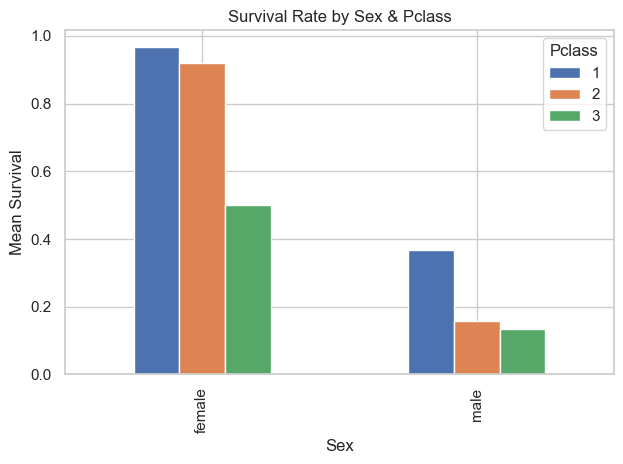

In [10]:
if {"Survived", "Sex", "Pclass"}.issubset(df.columns):
    pivot = pd.pivot_table(
        df, values="Survived", index="Sex", columns="Pclass", aggfunc="mean"
    )
    print("Mean survival rates by Sex and Pclass:")
    display(pivot.round(3))

    pivot.plot(kind="bar")
    plt.title("Survival Rate by Sex & Pclass")
    plt.ylabel("Mean Survival")
    plt.tight_layout()
    plt.show()
else:
    print("Need Survived, Sex, and Pclass to compute this pivot.")


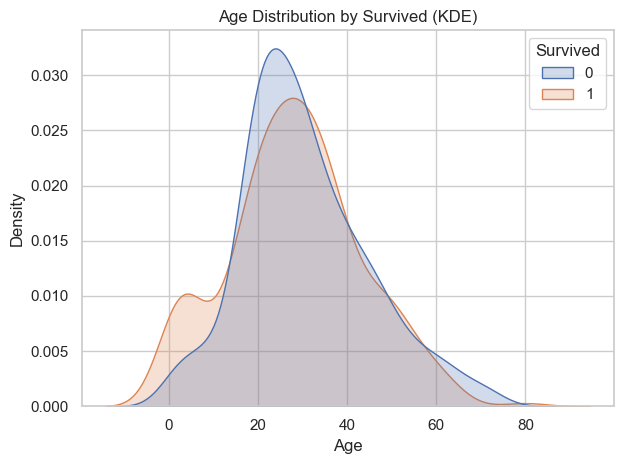

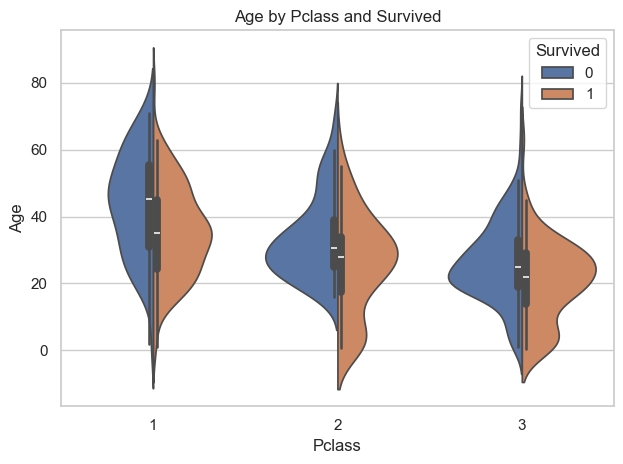

In [11]:
if {"Survived", "Age"}.issubset(df.columns):
    # Drop NA for clean plot
    age_df = df[["Survived", "Age"]].dropna()
    sns.kdeplot(data=age_df, x="Age", hue="Survived", common_norm=False, fill=True)
    plt.title("Age Distribution by Survived (KDE)")
    plt.tight_layout()
    plt.show()

    # Alternatively: violin/box by Pclass and Survived if available
    if "Pclass" in df.columns:
        sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True)
        plt.title("Age by Pclass and Survived")
        plt.tight_layout()
        plt.show()
else:
    print("Need Survived and Age for class-wise age distributions.")
